# GPT LOG REG

In [1]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('/Users/rusya/Documents/synthetic_data/inf_for_logit_regression/all_data_right_format_linear_regr_272.csv')
df

/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_6217/4065855491.py:1: DtypeWarning: Columns (37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rusya/Documents/synthetic_data/inf_for_logit_regression/all_data_right_format_linear_regr_272.csv')


,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q193_gpt,Q194_gpt,Q195_gpt,GDP_per_capita_2024,GDP_wvs_year,TradAgg,SurvSAgg,rd_idx_gpd,ict_idx_2024,Q275_4
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,5.0,2.0,4.0,46359.0,42819.774580,0.5486,2.1823,NaN,88.8,0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,6.0,2.0,4.0,46359.0,42819.774580,0.5486,2.1823,NaN,88.8,1
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,6.0,1.0,5.0,46359.0,42819.774580,0.5486,2.1823,NaN,88.8,1
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,6.0,2.0,4.0,46359.0,42819.774580,0.5486,2.1823,NaN,88.8,0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,6.0,2.0,5.0,46359.0,42819.774580,0.5486,2.1823,NaN,88.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,4.0,2.0,5.0,2073.0,1730.413489,-0.5850,-1.8709,0.21,47.7,0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,5.0,2.0,7.0,2073.0,1730.413489,-0.5850,-1.8709,0.21,47.7,1
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,3.0,2.0,4.0,2073.0,1730.413489,-0.5850,-1.8709,0.21,47.7,0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,3.0,2.0,4.0,2073.0,1730.413489,-0.5850,-1.8709,0.21,47.7,0


In [80]:
df.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287', 'Q273', 'Q274', 'Q289', 'Q158', 'Q159', 'Q160',
       'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183',
       'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192',
       'Q193', 'Q194', 'Q195', 'Q158_gpt', 'Q159_gpt', 'Q160_gpt', 'Q161_gpt',
       'Q162_gpt', 'Q177_gpt', 'Q178_gpt', 'Q179_gpt', 'Q180_gpt', 'Q181_gpt',
       'Q182_gpt', 'Q183_gpt', 'Q184_gpt', 'Q185_gpt', 'Q186_gpt', 'Q187_gpt',
       'Q188_gpt', 'Q189_gpt', 'Q190_gpt', 'Q191_gpt', 'Q192_gpt', 'Q193_gpt',
       'Q194_gpt', 'Q195_gpt', 'GDP_per_capita_2024', 'GDP_wvs_year',
       'TradAgg', 'SurvSAgg', 'rd_idx_gpd', 'ict_idx_2024', 'Q275_4'],
      dtype='object')

In [81]:
df = df.drop(columns=['Q275_4'])

In [62]:
df_fsi = pd.read_csv('/Users/rusya/Documents/synthetic_data/inf_for_logit_regression/FSI_language_difficulty_eng - Лист1.csv')

In [63]:
df_fsi

,code,language,closely related,similar to eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult
0,30,30 Afar,0,0,1,0,0
1,40,40 Afrikaans,1,0,0,0,0
2,100,100 Albanian,0,0,0,1,0
3,140,140 Amharic,0,0,0,1,0
4,170,170 Arabic,0,0,0,0,1
...,...,...,...,...,...,...,...
159,4620,4620 Yoruba,0,0,1,0,0
160,9000,9000 Other,0,0,0,0,0
161,9040,9040 Other European,0,1,0,0,0
162,9060,9060 Other Chinese dialects,0,0,0,0,1


In [64]:
df_fsi.rename(columns={'code': "Q272"}, inplace=True)
df_fsi 

,Q272,language,closely related,similar to eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult
0,30,30 Afar,0,0,1,0,0
1,40,40 Afrikaans,1,0,0,0,0
2,100,100 Albanian,0,0,0,1,0
3,140,140 Amharic,0,0,0,1,0
4,170,170 Arabic,0,0,0,0,1
...,...,...,...,...,...,...,...
159,4620,4620 Yoruba,0,0,1,0,0
160,9000,9000 Other,0,0,0,0,0
161,9040,9040 Other European,0,1,0,0,0
162,9060,9060 Other Chinese dialects,0,0,0,0,1


In [65]:
# Создадим новую колонку, которая = 1, если хоть одна из двух == 1
df_fsi['related_or_similar_to_eng'] = (
    df_fsi[['closely related', 'similar to eng']]
    .any(axis=1)               # True, если хотя бы в одной колонке True
    .astype(int)               # переведём булевы в 0/1
)

df_fsi = df_fsi.drop(columns=['closely related', 'similar to eng'])

df_fsi

,Q272,language,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,related_or_similar_to_eng
0,30,30 Afar,1,0,0,0
1,40,40 Afrikaans,0,0,0,1
2,100,100 Albanian,0,1,0,0
3,140,140 Amharic,0,1,0,0
4,170,170 Arabic,0,0,1,0
...,...,...,...,...,...,...
159,4620,4620 Yoruba,1,0,0,0
160,9000,9000 Other,0,0,0,0
161,9040,9040 Other European,0,0,0,1
162,9060,9060 Other Chinese dialects,0,0,1,0


In [66]:
df_fsi['fsi'] = df_fsi[['related_or_similar_to_eng', 'ling and/or cult differ', 'cignificant ling and/or cult differ', 'exceptionally difficult']].values.argmax(axis=1) + 1

In [67]:
df_fsi

,Q272,language,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,related_or_similar_to_eng,fsi
0,30,30 Afar,1,0,0,0,2
1,40,40 Afrikaans,0,0,0,1,1
2,100,100 Albanian,0,1,0,0,3
3,140,140 Amharic,0,1,0,0,3
4,170,170 Arabic,0,0,1,0,4
...,...,...,...,...,...,...,...
159,4620,4620 Yoruba,1,0,0,0,2
160,9000,9000 Other,0,0,0,0,1
161,9040,9040 Other European,0,0,0,1,1
162,9060,9060 Other Chinese dialects,0,0,1,0,4


In [69]:
print(*df_fsi['fsi'].unique())

2 1 3 4


In [83]:
df_fin = df.merge(
    df_fsi[[
        'language',
        'Q272',
        'related_or_similar_to_eng',
        'ling and/or cult differ',
        'cignificant ling and/or cult differ',
        'exceptionally difficult',
        'fsi'
    ]],
    on='Q272',
    how='left'
)

In [84]:
df_fin

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,TradAgg,SurvSAgg,rd_idx_gpd,ict_idx_2024,language,related_or_similar_to_eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,fsi
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0.5486,2.1823,NaN,88.8,810 Catalan; Valencian,1.0,0.0,0.0,0.0,1.0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,-0.5850,-1.8709,0.21,47.7,3200 North Ndebele,0.0,1.0,0.0,0.0,2.0
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0


In [75]:
print(*df_fin['fsi'].unique())

1.0 3.0 nan 4.0 2.0


In [88]:
df_fin.loc[df_fin['fsi'].isna(), 'Q272'].unique()

array([  -2, 3900,   -1,   -5,   -4, 2190])

In [89]:
df_fin

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,TradAgg,SurvSAgg,rd_idx_gpd,ict_idx_2024,language,related_or_similar_to_eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,fsi
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0.5486,2.1823,NaN,88.8,810 Catalan; Valencian,1.0,0.0,0.0,0.0,1.0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,-0.5850,-1.8709,0.21,47.7,3200 North Ndebele,0.0,1.0,0.0,0.0,2.0
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0


In [90]:
# Список нежелательных кодов
bad_codes = [-2, 3900, -1, -5, -4, 2190]

# Отфильтровать датафрейм, оставив только строки, где Q272 не в bad_codes
df_fin = df_fin[~df_fin['Q272'].isin(bad_codes)]

df_fin

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,TradAgg,SurvSAgg,rd_idx_gpd,ict_idx_2024,language,related_or_similar_to_eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,fsi
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0.5486,2.1823,NaN,88.8,810 Catalan; Valencian,1.0,0.0,0.0,0.0,1.0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0.5486,2.1823,NaN,88.8,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,-0.5850,-1.8709,0.21,47.7,3200 North Ndebele,0.0,1.0,0.0,0.0,2.0
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,-0.5850,-1.8709,0.21,47.7,3830 Shona;chiShona,0.0,1.0,0.0,0.0,2.0


In [91]:
questions = [
    'Q158', 'Q159', 'Q160', 'Q161', 'Q162',
    'Q177', 'Q178', 'Q179', 'Q180',
    'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189',
    'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195'
]

# Для каждой QXXX создаём колонку QXXX_y_gpt, где 1 = совпадают, 0 = нет
for q in questions:
    gpt_col = f"{q}_gpt"         
    new_col = f"{q}_y_gpt"    
    df_fin[new_col] = (df_fin[q] == df_fin[gpt_col]).astype(int)

df_fin

/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_6217/1013729331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin[new_col] = (df_fin[q] == df_fin[gpt_col]).astype(int)
/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_6217/1013729331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin[new_col] = (df_fin[q] == df_fin[gpt_col]).astype(int)
/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_6217/1013729331.py:12: SettingWithCopyWarning: 
A value is trying to be set

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q186_y_gpt,Q187_y_gpt,Q188_y_gpt,Q189_y_gpt,Q190_y_gpt,Q191_y_gpt,Q192_y_gpt,Q193_y_gpt,Q194_y_gpt,Q195_y_gpt
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0,0,0,1,0,1,1,0,0,0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0,0,0,1,1,1,1,0,0,0
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0,0,0,1,1,0,1,0,1,0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0,1,0,1,0,0,1,0,0,0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,1,0,1,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,0,1,0,1,0,0,1,0,0,0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,0,0,0,1,0,0,1,0,0,0
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,0,0,0,1,0,1,1,0,0,0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,0,0,0,1,0,1,1,0,0,0


In [92]:
df_fin.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287', 'Q273', 'Q274', 'Q289', 'Q158', 'Q159', 'Q160',
       'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183',
       'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192',
       'Q193', 'Q194', 'Q195', 'Q158_gpt', 'Q159_gpt', 'Q160_gpt', 'Q161_gpt',
       'Q162_gpt', 'Q177_gpt', 'Q178_gpt', 'Q179_gpt', 'Q180_gpt', 'Q181_gpt',
       'Q182_gpt', 'Q183_gpt', 'Q184_gpt', 'Q185_gpt', 'Q186_gpt', 'Q187_gpt',
       'Q188_gpt', 'Q189_gpt', 'Q190_gpt', 'Q191_gpt', 'Q192_gpt', 'Q193_gpt',
       'Q194_gpt', 'Q195_gpt', 'GDP_per_capita_2024', 'GDP_wvs_year',
       'TradAgg', 'SurvSAgg', 'rd_idx_gpd', 'ict_idx_2024', 'language',
       'related_or_similar_to_eng', 'ling and/or cult differ',
       'cignificant ling and/or cult differ', 'exceptionally difficult', 'fsi',
       'Q158_y_gpt', 'Q159_y_gpt', 'Q160_y_gpt', 'Q161_y_gpt', 'Q162_y_gpt',
       '

In [93]:
print(df_fin['fsi'].unique())

[1. 3. 4. 2.]


In [141]:
df_fin.to_csv('/Users/rusya/Documents/synthetic_data/dataframe_for_analysis/logit_reg_with_demo_and_gpd_fsi.csv')

In [222]:
df_fin.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287', 'Q273', 'Q274', 'Q289', 'Q158', 'Q159', 'Q160',
       'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183',
       'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192',
       'Q193', 'Q194', 'Q195', 'Q158_gpt', 'Q159_gpt', 'Q160_gpt', 'Q161_gpt',
       'Q162_gpt', 'Q177_gpt', 'Q178_gpt', 'Q179_gpt', 'Q180_gpt', 'Q181_gpt',
       'Q182_gpt', 'Q183_gpt', 'Q184_gpt', 'Q185_gpt', 'Q186_gpt', 'Q187_gpt',
       'Q188_gpt', 'Q189_gpt', 'Q190_gpt', 'Q191_gpt', 'Q192_gpt', 'Q193_gpt',
       'Q194_gpt', 'Q195_gpt', 'GDP_per_capita_2024', 'GDP_wvs_year',
       'TradAgg', 'SurvSAgg', 'rd_idx_gpd', 'ict_idx_2024', 'language',
       'related_or_similar_to_eng', 'ling and/or cult differ',
       'cignificant ling and/or cult differ', 'exceptionally difficult', 'fsi',
       'Q158_y_gpt', 'Q159_y_gpt', 'Q160_y_gpt', 'Q161_y_gpt', 'Q162_y_gpt',
       '

In [139]:
df_yandex = pd.read_csv('/Users/rusya/Documents/synthetic_data/dataframe_for_analysis/YANDEX_logit_reg_with_demo_and_gpd_fsi')

In [153]:
df_fsi_rus = pd.read_csv('/Users/rusya/Downloads/FSI_language_difficulty_rus - Лист1.csv')

In [155]:
df_fsi_rus.rename(columns={'code': "Q272"}, inplace=True)
df_fsi_rus

,Q272,language,fsi_rus
0,30,Afar,4
1,40,Afrikaans,2
2,100,Albanian,3
3,140,Amharic,4
4,170,Arabic,4
...,...,...,...
159,4620,Yoruba,4
160,9000,Other,3
161,9040,Other European,2
162,9060,Other Chinese dialects,4


In [157]:
df_yandex = df_yandex.merge(
    df_fsi_rus[[
        'language',
        'Q272',
        'fsi_rus'
    ]],
    on='Q272',
    how='left'
)

df_yandex

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q188_y_yandex,Q189_y_yandex,Q190_y_yandex,Q191_y_yandex,Q192_y_yandex,Q193_y_yandex,Q194_y_yandex,Q195_y_yandex,language_y,fsi_rus
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0,1,1,1,1,0,1,0,Spanish; Castilian,2
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0,1,1,1,1,0,1,0,Spanish; Castilian,2
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0,1,1,0,1,0,1,1,Catalan; Valencian,2
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0,1,1,1,1,0,1,0,Spanish; Castilian,2
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0,1,1,1,1,0,1,0,Spanish; Castilian,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,85303,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,0,1,1,1,1,0,1,0,Shona; chiShona,4
82938,85304,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,0,1,0,1,1,0,1,0,North Ndebele,4
82939,85305,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,1,1,1,1,1,0,1,0,Shona; chiShona,4
82940,85306,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,1,1,1,1,1,0,1,0,Shona; chiShona,4


## Таблица с accuracy для GPT

In [95]:
import matplotlib.pyplot as plt

In [96]:
arr = [str(i) for i in list(range(158, 163)) + list(range(177, 196))]

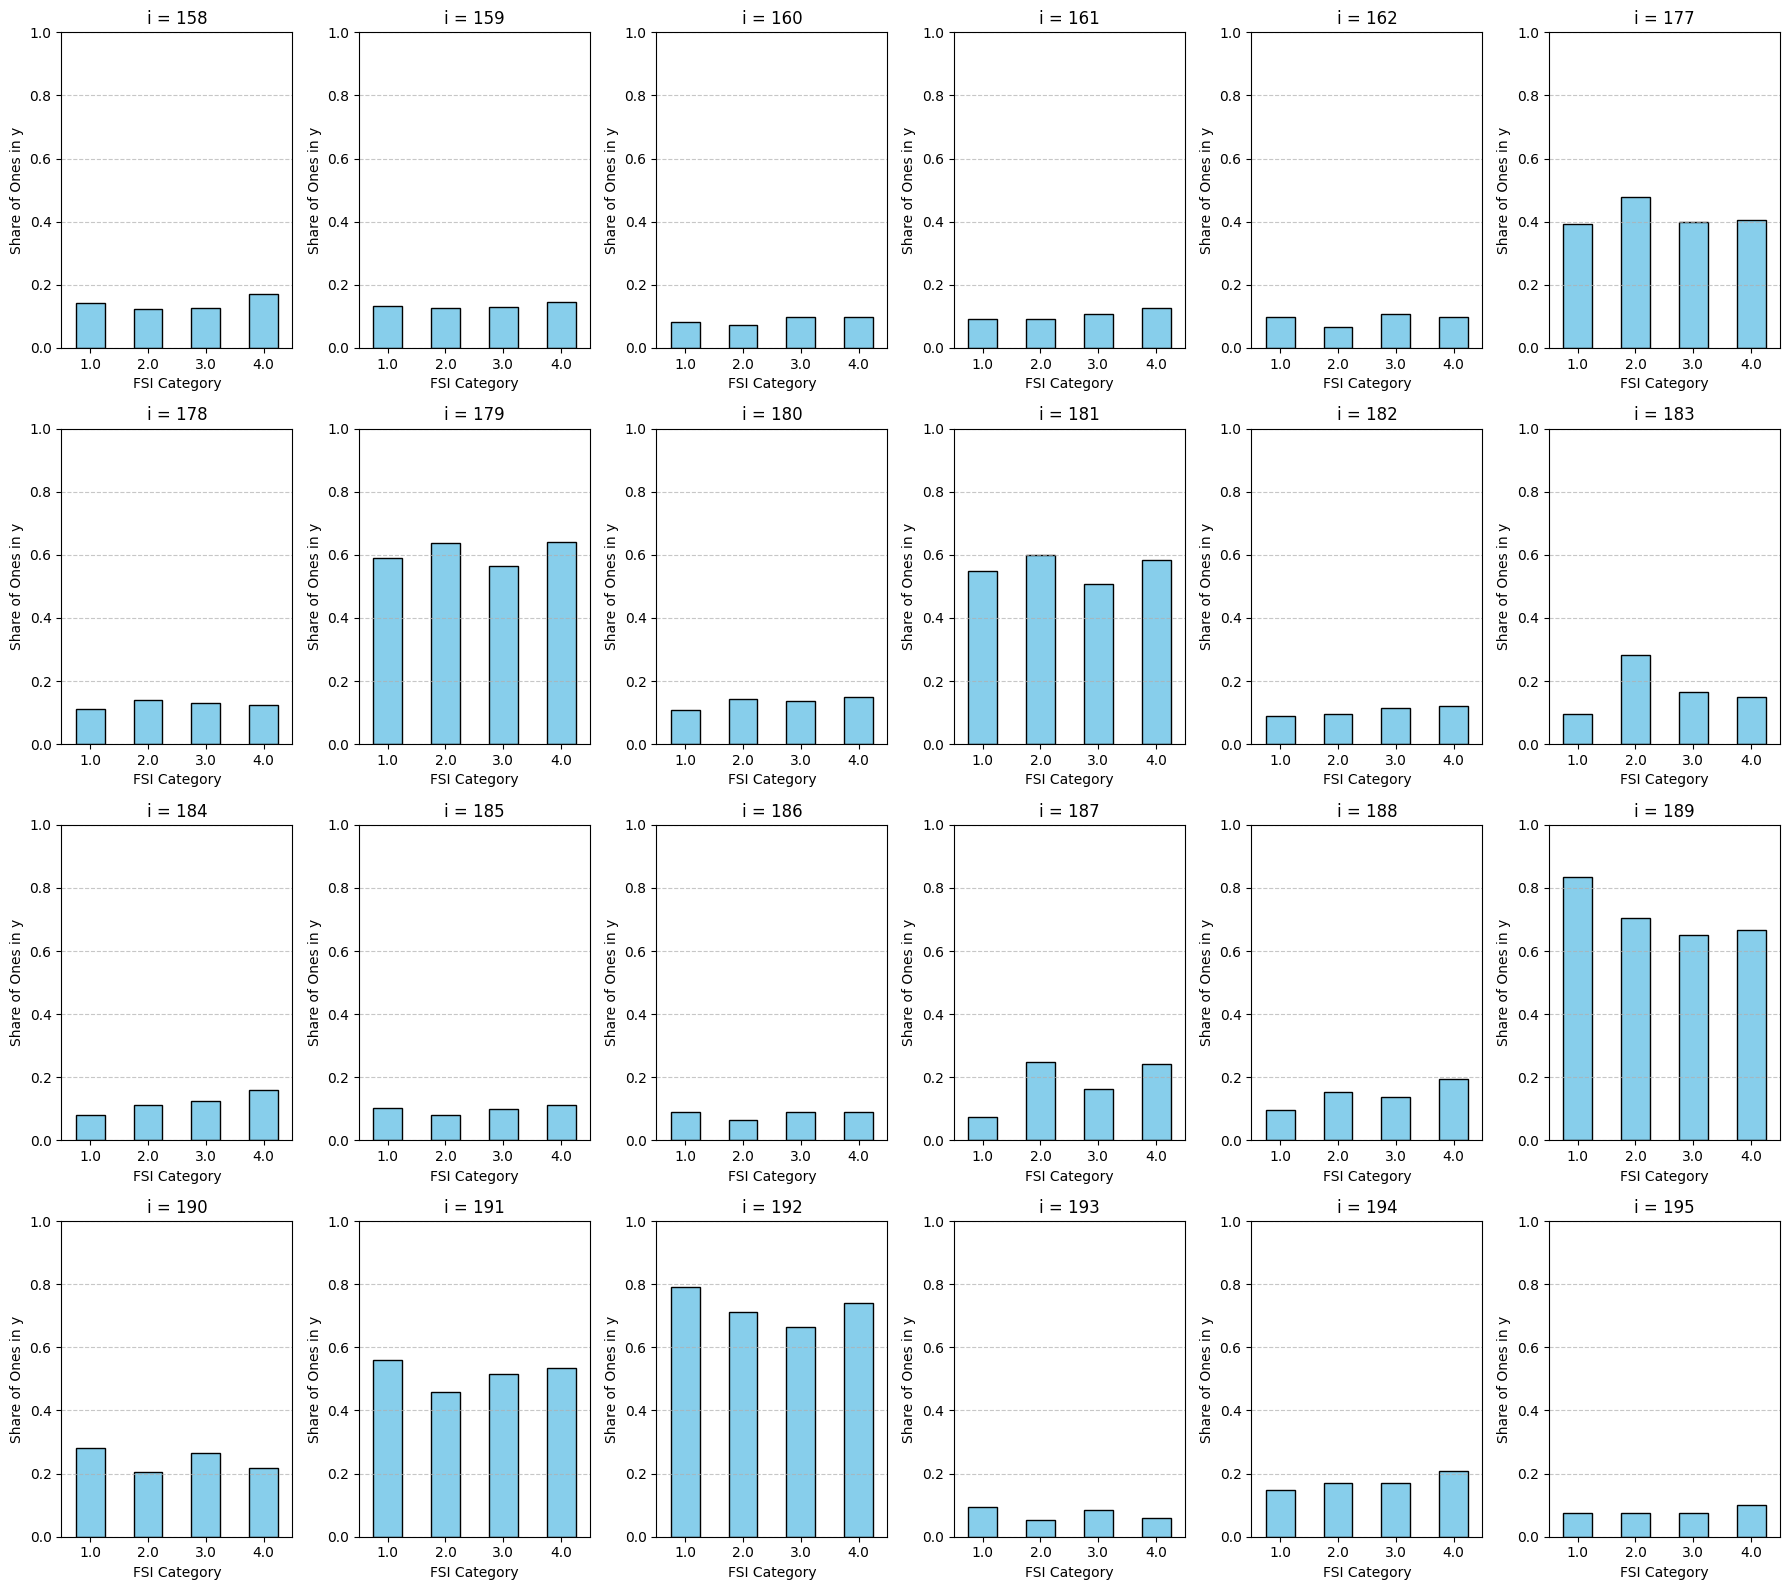

In [98]:
def plot_accuracy(i, df1, ax=None):
    name_gpt = f'Q{i}_gpt'
    name_y = f'Q{i}_y_gpt'
    df1 = df1.copy()
    df1[name_y] = (df1[f'Q{i}'] == df1[name_gpt])
    share_ones = df1.groupby('fsi')[name_y].mean()
    share_ones = share_ones.sort_index()

    # Use the provided axis if present
    if ax is None:
        ax = plt.gca()
    share_ones.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_xlabel('FSI Category')
    ax.set_ylabel('Share of Ones in y')
    ax.set_title(f'i = {i}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.0)
    ax.set_xticklabels(share_ones.index, rotation=0)

# 24 elements, 6 rows, 4 columns
fig, axes = plt.subplots(4, 6, figsize=(18, 16))
axes = axes.flatten()

for idx, i in enumerate(arr):
    plot_accuracy(int(i), df_fin, ax=axes[idx])

# Turn off any unused subplots (if arr < 24)
for j in range(len(arr), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Построим логистическую регрессию для GPT

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Q177, Q179, Q181, Q189, Q191, Q192 - вопросы, для которых строим логит-регрессию

## Логит регрессия по fsi для Q177. Justifiable: Claiming government benefits to which you are not entitled

In [184]:
var_sample = df['Q177'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 7.4227


In [185]:
var_sample = df['Q177_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия gpt (Pandas): 0.2234


In [177]:
df_q177 = df_fin.copy()
df_q177 = df_q177.dropna(subset = ['Q177', 'Q177_gpt'])

formula = (
    'Q177_y_gpt ~ C(fsi)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q177)
results_q177 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q177.summary())

Optimization terminated successfully.
         Current function value: 0.674026
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:             Q177_y_gpt   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                0.001817
Time:                        21:32:00   Log-Likelihood:                -55905.
converged:                       True   LL-Null:                       -56007.
Covariance Type:            nonrobust   LLR p-value:                 7.307e-44
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4364      0.

In [142]:
formula = (
    'Q177_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q177)
results_q177_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q177_ict.summary())

Optimization terminated successfully.
         Current function value: 0.671939
         Iterations: 40
         Function evaluations: 43
         Gradient evaluations: 43
                           Logit Regression Results                           
Dep. Variable:             Q177_y_gpt   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                0.006684
Time:                        20:22:39   Log-Likelihood:                -46173.
converged:                       True   LL-Null:                       -46484.
Covariance Type:            nonrobust   LLR p-value:                5.916e-130
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2749      0.

## Логит регрессия по fsi для Q179. Justifiable: Stealing property

In [186]:
var_sample1 = df['Q179'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q179_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.3133
Выборочная дисперсия gpt (Pandas): 0.1620


In [137]:
df_q179 = df_fin.copy()
df_q179 = df_q179.dropna(subset = ['Q179', 'Q179_gpt'])

formula = (
    'Q179_y_gpt ~ C(fsi)' 
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q179)
results_q179 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q179.summary())

Optimization terminated successfully.
         Current function value: 0.672224
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                           Logit Regression Results                           
Dep. Variable:             Q179_y_gpt   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                0.002905
Time:                        16:51:48   Log-Likelihood:                -55756.
converged:                       True   LL-Null:                       -55918.
Covariance Type:            nonrobust   LLR p-value:                 4.023e-70
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3584      0.

In [125]:
formula = (
    'Q179_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q179)
results_q179_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q179_ict.summary())

Optimization terminated successfully.
         Current function value: 0.664107
         Iterations: 41
         Function evaluations: 44
         Gradient evaluations: 44
                           Logit Regression Results                           
Dep. Variable:             Q179_y_gpt   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.01108
Time:                        16:15:11   Log-Likelihood:                -45635.
converged:                       True   LL-Null:                       -46146.
Covariance Type:            nonrobust   LLR p-value:                1.444e-216
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4580      0.

## Логит регрессия по fsi для Q181. Justifiable: Someone accepting a bribe in the course of their duties

In [187]:
var_sample1 = df['Q181'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q181_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.8385
Выборочная дисперсия gpt (Pandas): 0.1838


In [126]:
df_q181 = df_fin.copy()
df_q181 = df_q181.dropna(subset = ['Q181', 'Q181_gpt'])

formula = (
    'Q181_y_gpt ~ C(fsi)' 
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q181)
results_q181 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q181.summary())

Optimization terminated successfully.
         Current function value: 0.686281
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:             Q181_y_gpt   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                0.003176
Time:                        16:16:08   Log-Likelihood:                -56922.
converged:                       True   LL-Null:                       -57103.
Covariance Type:            nonrobust   LLR p-value:                 2.705e-78
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1949      0.

In [127]:
formula = (
    'Q181_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q181)
results_q181_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q181_ict.summary())

Optimization terminated successfully.
         Current function value: 0.679811
         Iterations: 39
         Function evaluations: 42
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:             Q181_y_gpt   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.01128
Time:                        16:16:33   Log-Likelihood:                -46714.
converged:                       True   LL-Null:                       -47247.
Covariance Type:            nonrobust   LLR p-value:                6.636e-226
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5994      0.

## Логит регрессия по fsi для Q189. Justifiable: For a man to beat his wife

In [188]:
var_sample1 = df['Q189'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q189_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.5510
Выборочная дисперсия gpt (Pandas): 0.0016


In [128]:
df_q189 = df_fin.copy()
df_q189 = df_q189.dropna(subset = ['Q189', 'Q189_gpt'])

formula = (
    'Q189_y_gpt ~ C(fsi)' 
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q189)
results_q189 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q189.summary())

Optimization terminated successfully.
         Current function value: 0.568671
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                           Logit Regression Results                           
Dep. Variable:             Q189_y_gpt   No. Observations:                82935
Model:                          Logit   Df Residuals:                    82931
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.03160
Time:                        16:18:01   Log-Likelihood:                -47163.
converged:                       True   LL-Null:                       -48702.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6225      0.

In [129]:
formula = (
    'Q189_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q189)
results_q189_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q189_ict.summary())

Optimization terminated successfully.
         Current function value: 0.550517
         Iterations: 45
         Function evaluations: 48
         Gradient evaluations: 48
                           Logit Regression Results                           
Dep. Variable:             Q189_y_gpt   No. Observations:                68710
Model:                          Logit   Df Residuals:                    68702
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.03506
Time:                        16:18:22   Log-Likelihood:                -37826.
converged:                       True   LL-Null:                       -39200.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7071      0.

## Логит регрессия по fsi для Q191. Justifiable: Violence against other people

In [189]:
var_sample1 = df['Q191'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q191_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.5754
Выборочная дисперсия gpt (Pandas): 0.1881


In [132]:
df_q191 = df_fin.copy()
df_q191 = df_q191.dropna(subset = ['Q191', 'Q191_gpt'])

formula = (
    'Q191_y_gpt ~ C(fsi)' 
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q191)
results_q191 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q191.summary())

Optimization terminated successfully.
         Current function value: 0.689641
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:             Q191_y_gpt   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                0.002508
Time:                        16:23:02   Log-Likelihood:                -57200.
converged:                       True   LL-Null:                       -57344.
Covariance Type:            nonrobust   LLR p-value:                 4.709e-62
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2350      0.

In [131]:
formula = (
    'Q191_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q191)
results_q191_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q191_ict.summary())

Optimization terminated successfully.
         Current function value: 0.685605
         Iterations: 38
         Function evaluations: 42
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:             Q191_y_gpt   No. Observations:                68710
Model:                          Logit   Df Residuals:                    68702
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                0.008506
Time:                        16:21:30   Log-Likelihood:                -47108.
converged:                       True   LL-Null:                       -47512.
Covariance Type:            nonrobust   LLR p-value:                2.971e-170
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8346      0.

## Логит регрессия по fsi для Q192. Justifiable:  Terrorism as a political, ideological or religious mean

In [190]:
var_sample1 = df['Q192'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q192_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 4.6548
Выборочная дисперсия gpt (Pandas): 0.0000


In [209]:
var_sample1 = df['Q192'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df['Q192_gpt'].var()
print(f"Выборочная дисперсия gpt (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 4.6548
Выборочная дисперсия gpt (Pandas): 0.0000


In [226]:
df_q186 = df_fin.copy()
df_q186 = df_q186.dropna(subset = ['Q160', 'Q160_gpt'])

formula = (
    'Q160_y_gpt ~ C(fsi)' 
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q186)
results_q186 = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q186.summary())

Optimization terminated successfully.
         Current function value: 0.300088
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
                           Logit Regression Results                           
Dep. Variable:             Q160_y_gpt   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 Jun 2025   Pseudo R-squ.:                0.001753
Time:                        16:12:14   Log-Likelihood:                -24890.
converged:                       True   LL-Null:                       -24934.
Covariance Type:            nonrobust   LLR p-value:                 7.947e-19
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4289      0.

In [134]:
formula = (
    'Q192_y_gpt ~ C(fsi) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q192)
results_q192_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q192_ict.summary())

Optimization terminated successfully.
         Current function value: 0.566589
         Iterations: 45
         Function evaluations: 48
         Gradient evaluations: 48
                           Logit Regression Results                           
Dep. Variable:             Q192_y_gpt   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.01301
Time:                        16:23:44   Log-Likelihood:                -38934.
converged:                       True   LL-Null:                       -39447.
Covariance Type:            nonrobust   LLR p-value:                2.418e-217
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9369      0.

# Построим линейную регрессию для GPT

## Q177, Q179, Q181, Q189, Q191, Q192 - вопросы, для которых строим логит-регрессию

## Линейная регрессия по fsi для Q177. Justifiable: Claiming government benefits to which you are not entitled

In [230]:
df_qi = df_fin.copy()
# Убираем пропуски
df_qi = df_qi.dropna(subset=['Q160', 'Q160_gpt'])
df_qi['Q160']     = pd.to_numeric(df_qi['Q160'],     errors='coerce')
df_qi['Q160_gpt'] = pd.to_numeric(df_qi['Q160_gpt'], errors='coerce')
# Создаём |ответ_человека − ответ_GPT|
df_qi['Q160_diff_gpt'] = (df_qi['Q160'] - df_qi['Q160_gpt'])

<Axes: >

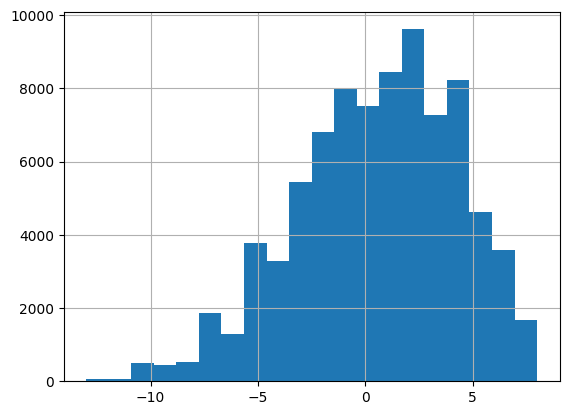

In [231]:
df_qi['Q160_diff_gpt'].describe()
df_qi['Q160_diff_gpt'].hist(bins=20)

# Таблица с accuracy для YANDEX

In [158]:
arr = [str(i) for i in list(range(158, 163)) + list(range(183, 196))]

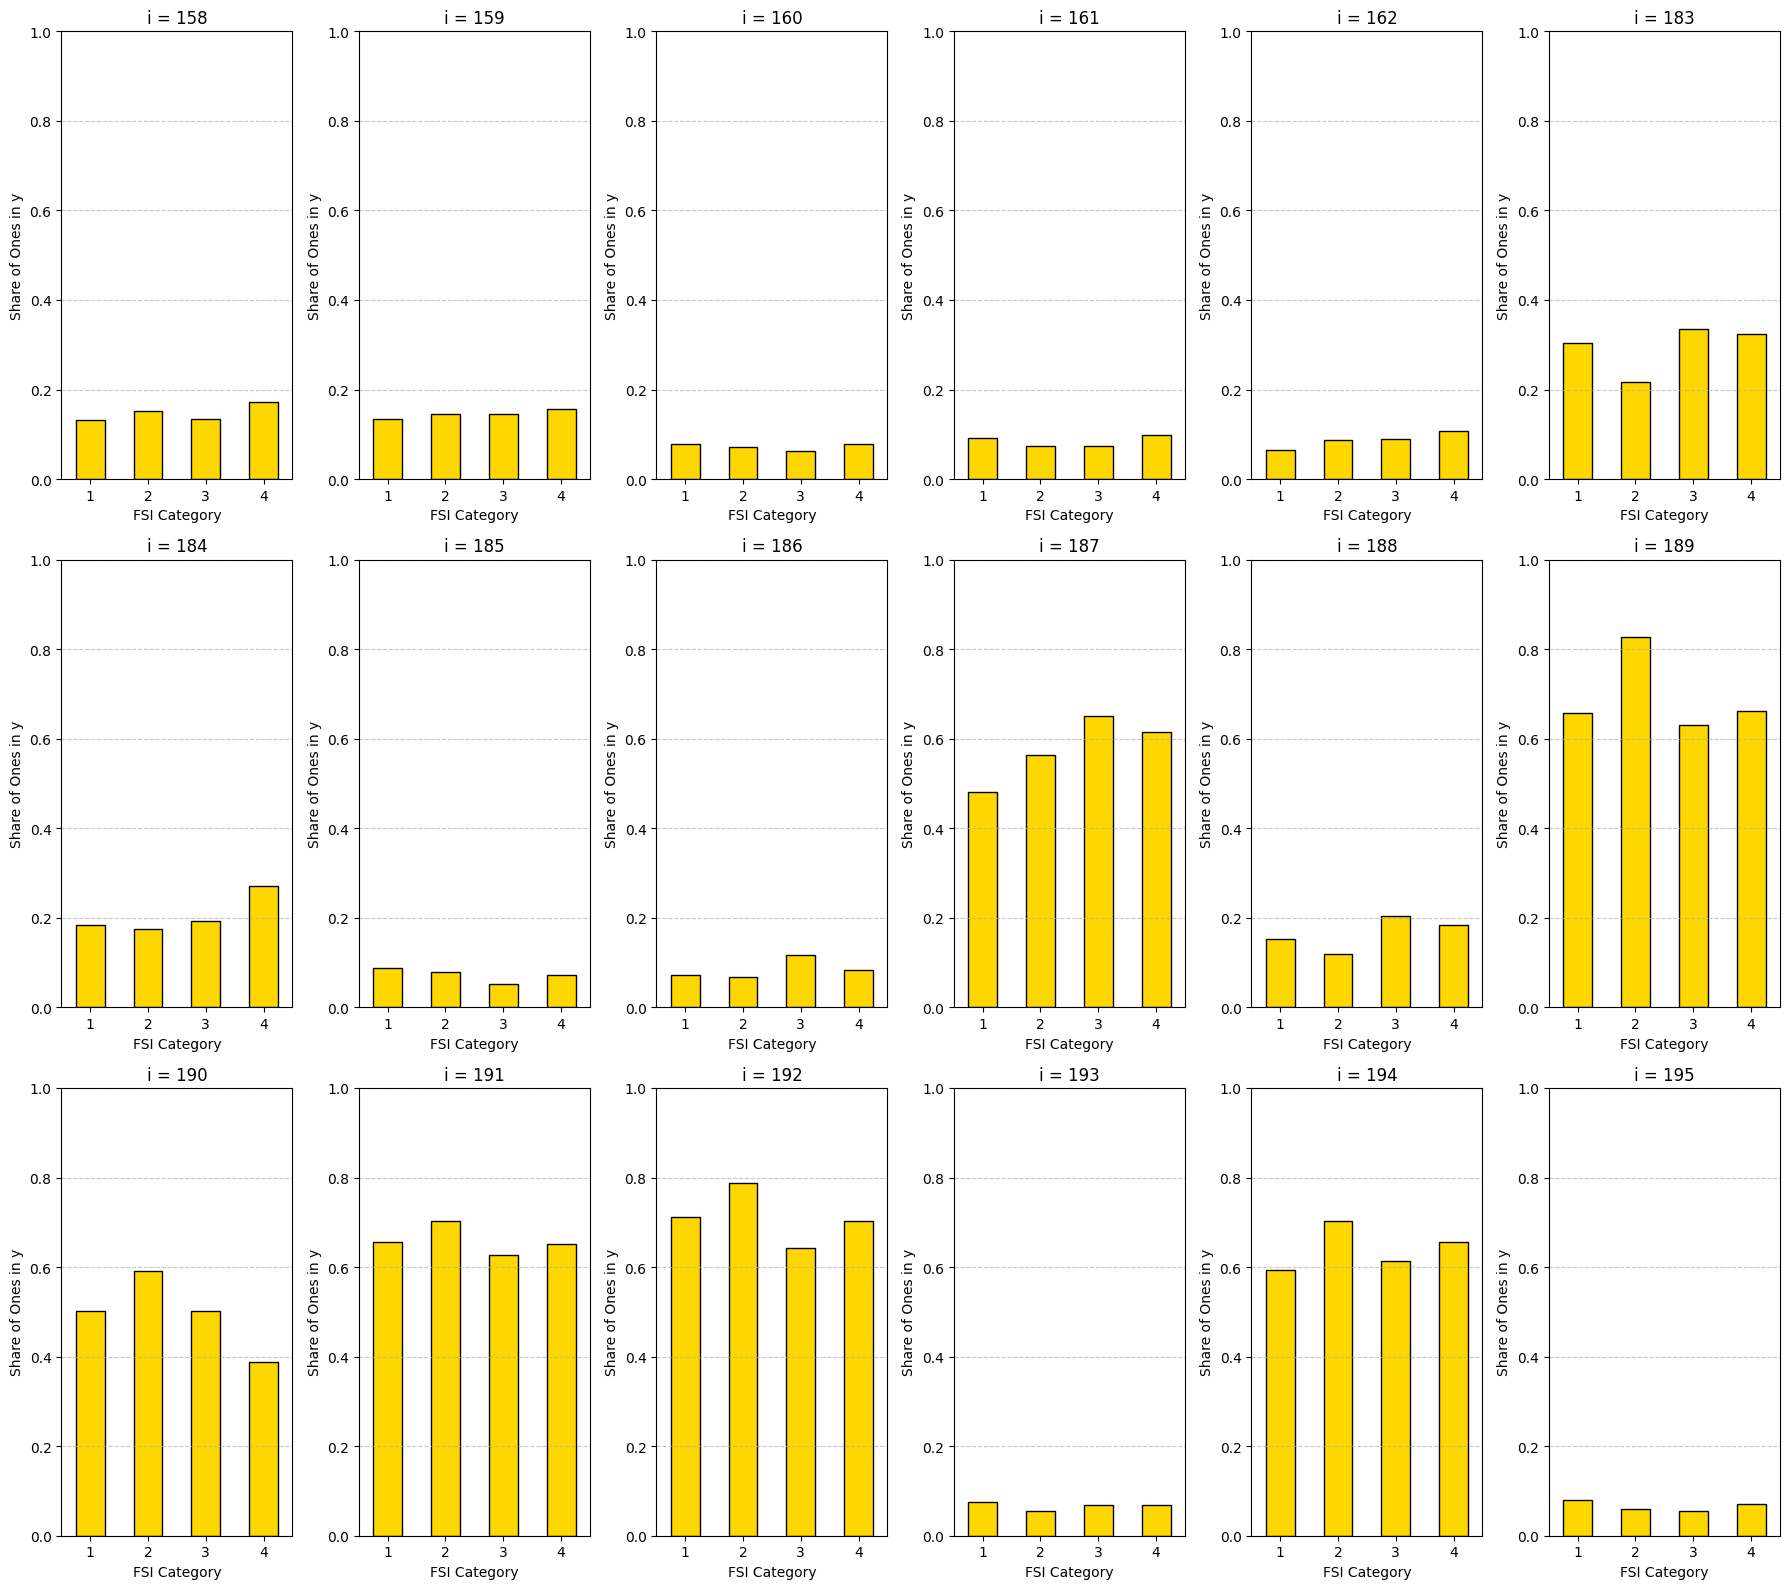

In [234]:
def plot_accuracy(i, df1, ax=None):
    name_gpt = f'Q{i}_yandex'
    name_y = f'Q{i}_y_yandex'
    df1 = df1.copy()
    df1[name_y] = (df1[f'Q{i}'] == df1[name_gpt])
    share_ones = df1.groupby('fsi_rus')[name_y].mean()
    share_ones = share_ones.sort_index()

    # Use the provided axis if present
    if ax is None:
        ax = plt.gca()
    share_ones.plot(kind='bar', color='gold', edgecolor='black', ax=ax)
    ax.set_xlabel('FSI Category')
    ax.set_ylabel('Share of Ones in y')
    ax.set_title(f'i = {i}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.0)
    ax.set_xticklabels(share_ones.index, rotation=0)

# 18 elements, 6 rows, 3 columns
fig, axes = plt.subplots(3, 6, figsize=(18, 16))
axes = axes.flatten()

for idx, i in enumerate(arr):
    plot_accuracy(int(i), df_yandex, ax=axes[idx])

# Turn off any unused subplots (if arr < 24)
for j in range(len(arr), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Q187, Q189, Q190, Q191, Q192, Q194 - вопросы, для которых строим логит-регрессию

## Логит регрессия по fsi для Q187. Justifiable: Suicide

In [198]:
var_sample1 = df_yandex['Q187'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q187_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 5.8124
Выборочная дисперсия yandex (Pandas): 0.0038


In [163]:
df_q187_yandex = df_yandex.copy()
df_q187_yandex = df_q187_yandex.dropna(subset = ['Q187', 'Q187_y_yandex'])

formula = (
    'Q187_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q187_yandex)
results_q187_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q187_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.673180
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:          Q187_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                0.005857
Time:                        16:53:56   Log-Likelihood:                -55835.
converged:                       True   LL-Null:                       -56164.
Covariance Type:            nonrobust   LLR p-value:                2.860e-142
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0781  

In [166]:
formula = (
    'Q187_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q187_yandex)
results_q187_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q187_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.599940
         Iterations: 45
         Function evaluations: 48
         Gradient evaluations: 48
                           Logit Regression Results                           
Dep. Variable:          Q187_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.1090
Time:                        17:04:48   Log-Likelihood:                -41225.
converged:                       True   LL-Null:                       -46270.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3954  

## Логит регрессия по fsi для Q189. Justifiable: For a man to beat his wife

In [199]:
var_sample1 = df_yandex['Q189'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q189_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.5653
Выборочная дисперсия yandex (Pandas): 0.0020


In [167]:
df_q189_yandex = df_yandex.copy()
df_q189_yandex = df_q189_yandex.dropna(subset = ['Q189', 'Q189_y_yandex'])

formula = (
    'Q189_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q189_yandex)
results_q189_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q189_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.567424
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
                           Logit Regression Results                           
Dep. Variable:          Q189_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.03325
Time:                        17:05:38   Log-Likelihood:                -47063.
converged:                       True   LL-Null:                       -48682.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6508  

In [168]:
formula = (
    'Q189_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q189_yandex)
results_q189_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q189_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.546475
         Iterations: 47
         Function evaluations: 50
         Gradient evaluations: 50
                           Logit Regression Results                           
Dep. Variable:          Q189_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.04161
Time:                        17:06:02   Log-Likelihood:                -37552.
converged:                       True   LL-Null:                       -39182.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3580  

## Логит регрессия по fsi для Q190. Justifiable: Parents beating children

In [200]:
var_sample1 = df_yandex['Q190'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q190_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 6.7627
Выборочная дисперсия yandex (Pandas): 0.0002


In [169]:
df_q190_yandex = df_yandex.copy()
df_q190_yandex = df_q190_yandex.dropna(subset = ['Q190', 'Q190_y_yandex'])

formula = (
    'Q190_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q190_yandex)
results_q190_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q190_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.677017
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
                           Logit Regression Results                           
Dep. Variable:          Q190_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.02327
Time:                        17:09:23   Log-Likelihood:                -56153.
converged:                       True   LL-Null:                       -57491.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0055  

In [170]:
formula = (
    'Q190_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q190_yandex)
results_q190_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q190_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.669334
         Iterations: 42
         Function evaluations: 45
         Gradient evaluations: 45
                           Logit Regression Results                           
Dep. Variable:          Q190_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.03376
Time:                        17:09:25   Log-Likelihood:                -45994.
converged:                       True   LL-Null:                       -47601.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.6383  

## Логит регрессия по fsi для Q191. Justifiable: Violence against other people

In [201]:
var_sample1 = df_yandex['Q191'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q191_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.5805
Выборочная дисперсия yandex (Pandas): 0.0000


In [171]:
df_q191_yandex = df_yandex.copy()
df_q191_yandex = df_q191_yandex.dropna(subset = ['Q191', 'Q191_y_yandex'])

formula = (
    'Q190_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q191_yandex)
results_q191_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q191_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.677017
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
                           Logit Regression Results                           
Dep. Variable:          Q190_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.02327
Time:                        17:09:28   Log-Likelihood:                -56153.
converged:                       True   LL-Null:                       -57491.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0055  

In [172]:
formula = (
    'Q191_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q191_yandex)
results_q191_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q191_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.620409
         Iterations: 44
         Function evaluations: 47
         Gradient evaluations: 47
                           Logit Regression Results                           
Dep. Variable:          Q191_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.01339
Time:                        17:09:31   Log-Likelihood:                -42632.
converged:                       True   LL-Null:                       -43210.
Covariance Type:            nonrobust   LLR p-value:                1.461e-245
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7382  

## Логит регрессия по fsi для Q192. Justifiable: Terrorism as a political, ideological or religious mean

In [202]:
var_sample1 = df_yandex['Q192'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q192_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 3.5704
Выборочная дисперсия yandex (Pandas): 0.0000


In [173]:
df_q192_yandex = df_yandex.copy()
df_q192_yandex = df_q192_yandex.dropna(subset = ['Q192', 'Q192_y_yandex'])

formula = (
    'Q192_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q192_yandex)
results_q192_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q192_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.575704
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
                           Logit Regression Results                           
Dep. Variable:          Q192_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.01242
Time:                        17:09:34   Log-Likelihood:                -47750.
converged:                       True   LL-Null:                       -48350.
Covariance Type:            nonrobust   LLR p-value:                4.864e-260
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9054  

In [174]:
formula = (
    'Q192_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q192_yandex)
results_q192_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q192_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.563980
         Iterations: 46
         Function evaluations: 49
         Gradient evaluations: 49
                           Logit Regression Results                           
Dep. Variable:          Q192_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.01915
Time:                        17:09:43   Log-Likelihood:                -38754.
converged:                       True   LL-Null:                       -39511.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5926  

## Логит регрессия по fsi для Q194. Justifiable: Political violence

In [203]:
var_sample1 = df_yandex['Q194'].var()
print(f"Выборочная дисперсия (Pandas): {var_sample1:.4f}")

var_sample = df_yandex['Q194_yandex'].var()
print(f"Выборочная дисперсия yandex (Pandas): {var_sample:.4f}")

Выборочная дисперсия (Pandas): 4.0662
Выборочная дисперсия yandex (Pandas): 0.0000


In [175]:
df_q194_yandex = df_yandex.copy()
df_q194_yandex = df_q194_yandex.dropna(subset = ['Q194', 'Q194_y_yandex'])

formula = (
    'Q194_y_yandex ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q194_yandex)
results_q194_yandex = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q194_yandex.summary())

Optimization terminated successfully.
         Current function value: 0.634568
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                           Logit Regression Results                           
Dep. Variable:          Q194_y_yandex   No. Observations:                82942
Model:                          Logit   Df Residuals:                    82938
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                0.005065
Time:                        17:09:56   Log-Likelihood:                -52632.
converged:                       True   LL-Null:                       -52900.
Covariance Type:            nonrobust   LLR p-value:                7.979e-116
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3784  

In [176]:
formula = (
    'Q194_y_yandex ~ C(fsi_rus) + '
    'ict_idx_2024 + '
    'rd_idx_gpd + '
    'TradAgg + '
    'SurvSAgg'
    # 'GDP_wvs_year'
)

model = sm.formula.logit(formula, data=df_q194_yandex)
results_q194_yandex_ict = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q194_yandex_ict.summary())

Optimization terminated successfully.
         Current function value: 0.621267
         Iterations: 44
         Function evaluations: 47
         Gradient evaluations: 47
                           Logit Regression Results                           
Dep. Variable:          Q194_y_yandex   No. Observations:                68716
Model:                          Logit   Df Residuals:                    68708
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.01786
Time:                        17:10:01   Log-Likelihood:                -42691.
converged:                       True   LL-Null:                       -43467.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6716  

In [211]:
import pandas as pd

# Укажите реальное имя вашего DataFrame, например:
df_data = df  # или df, или ваше имя

questions = ['Q158', 'Q159', 'Q160', 'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195']
real_cols = questions
gpt_cols  = [q + '_gpt' for q in questions]

rows = []
for real_col, gpt_col in zip(real_cols, gpt_cols):
    real = pd.to_numeric(df_data[real_col], errors='coerce').dropna()
    gpt  = pd.to_numeric(df_data[gpt_col], errors='coerce').dropna()
    var_real = real.var()
    var_gpt  = gpt.var()
    rows.append({
        'Вопрос': real_col,
        'var_real ': var_real,
        'var_gpt  ': var_gpt,
    })

summary_df = pd.DataFrame(rows).set_index('Вопрос')
print(summary_df)

        var_real   var_gpt  
Вопрос                      
Q158     8.278347   0.770578
Q159     8.034759   0.603212
Q160    10.492107   2.538226
Q161    10.305779   1.039331
Q162     9.979470   2.105005
Q177     7.422680   0.223434
Q178     7.940450   0.260205
Q179     3.313258   0.161951
Q180     4.774842   0.270865
Q181     3.838483   0.183767
Q182    13.223283   2.760073
Q183     9.757008   1.173139
Q184     8.583444   2.462109
Q185    10.371859   1.952281
Q186    13.286797   4.266337
Q187     5.749415   1.161759
Q188    10.156361   2.314029
Q189     3.551017   0.001616
Q190     6.696137   0.587171
Q191     3.575411   0.188076
Q192     4.654775   0.000035
Q193    11.452538   1.485720
Q194     5.204022   0.274870
Q195    10.521899   0.946720


In [290]:
import pandas as pd

# Укажите реальное имя вашего DataFrame, например:
df_data = df_1_5  # или df, или ваше имя

questions = ['Q158', 'Q159', 'Q160', 'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195']
real_cols = ['Q158_recoded', 'Q159_recoded', 'Q160_recoded', 'Q161_recoded', 'Q162_recoded', 'Q177_recoded', 'Q178_recoded', 'Q179_recoded', 'Q180_recoded', 'Q181_recoded', 'Q182_recoded', 'Q183_recoded', 'Q184_recoded', 'Q185_recoded', 'Q186_recoded', 'Q187_recoded', 'Q188_recoded', 'Q189_recoded', 'Q190_recoded', 'Q191_recoded', 'Q192_recoded', 'Q193_recoded', 'Q194_recoded', 'Q195_recoded']
gpt_cols  = [q + '_gpt_recoded' for q in questions]

rows = []
for real_col, gpt_col in zip(real_cols, gpt_cols):
    real = pd.to_numeric(df_data[real_col], errors='coerce').dropna()
    gpt  = pd.to_numeric(df_data[gpt_col], errors='coerce').dropna()
    var_real = real.var()
    var_gpt  = gpt.var()
    rows.append({
        'Вопрос': real_col,
        'var_real ': var_real,
        'var_gpt  ': var_gpt,
    })

summary_df = pd.DataFrame(rows).set_index('Вопрос')
print(summary_df)

              var_real   var_gpt  
Вопрос                            
Q158_recoded   1.285053   0.238326
Q159_recoded   1.200902   0.255876
Q160_recoded   1.932016   0.558162
Q161_recoded   1.812155   0.353519
Q162_recoded   1.952885   0.576255
Q177_recoded   1.583998   0.022441
Q178_recoded   1.473269   0.153426
Q179_recoded   0.691773   0.001012
Q180_recoded   1.015332   0.189425
Q181_recoded   0.808865   0.003484
Q182_recoded   2.322628   0.673945
Q183_recoded   1.507216   0.314702
Q184_recoded   1.817326   0.696150
Q185_recoded   2.169705   0.518773
Q186_recoded   2.433372   1.142049
Q187_recoded   1.214476   0.306955
Q188_recoded   2.094252   0.628788
Q189_recoded   0.737515   0.000096
Q190_recoded   1.441191   0.175047
Q191_recoded   0.750334   0.000362
Q192_recoded   0.694871   0.000000
Q193_recoded   1.902153   0.417802
Q194_recoded   0.800233   0.119376
Q195_recoded   2.191650   0.318724


In [292]:
import pandas as pd

# Укажите реальное имя вашего DataFrame, например:
df_data = df_1_5_yandex  # или df, или ваше имя

questions = ['Q158', 'Q159', 'Q160', 'Q161', 'Q162', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195']
real_cols = ['Q158_recoded', 'Q159_recoded', 'Q160_recoded', 'Q161_recoded', 'Q162_recoded', 'Q183_recoded', 'Q184_recoded', 'Q185_recoded', 'Q186_recoded', 'Q187_recoded', 'Q188_recoded', 'Q189_recoded', 'Q190_recoded', 'Q191_recoded', 'Q192_recoded', 'Q193_recoded', 'Q194_recoded', 'Q195_recoded']
gpt_cols  = [q + '_yandex_recoded' for q in questions]

# questions = ['Q158', 'Q159', 'Q160', 'Q161', 'Q162', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195']
# real_cols = questions
# gpt_cols  = [q + '_yandex' for q in questions]

rows = []
for real_col, gpt_col in zip(real_cols, gpt_cols):
    real = pd.to_numeric(df_data[real_col], errors='coerce').dropna()
    gpt  = pd.to_numeric(df_data[gpt_col], errors='coerce').dropna()
    var_real = real.var()
    var_gpt  = gpt.var()
    rows.append({
       'Вопрос': real_col,
        'var_real ': var_real,
        'var_yandex  ': var_gpt,
    })

summary_df = pd.DataFrame(rows).set_index('Вопрос')
print(summary_df)

              var_real   var_yandex  
Вопрос                               
Q158_recoded   1.285053      0.212812
Q159_recoded   1.200902      0.248313
Q160_recoded   1.932016      1.255302
Q161_recoded   1.812155      0.249941
Q162_recoded   1.952885      0.485662
Q183_recoded   1.507216      0.135857
Q184_recoded   1.817326      1.060179
Q185_recoded   2.169705      0.715790
Q186_recoded   2.433372      1.551780
Q187_recoded   1.214476      0.000000
Q188_recoded   2.094252      0.395714
Q189_recoded   0.737515      0.000386
Q190_recoded   1.441191      0.000000
Q191_recoded   0.750334      0.000000
Q192_recoded   0.694871      0.000000
Q193_recoded   1.902153      0.109096
Q194_recoded   0.800233      0.000000
Q195_recoded   2.191650      0.643331


In [239]:
import pandas as pd

questions = [
    'Q158', 'Q159', 'Q160', 'Q161', 'Q162',
    'Q177', 'Q178', 'Q179', 'Q180', 'Q181',
    'Q182', 'Q183', 'Q184', 'Q185', 'Q186',
    'Q187', 'Q188', 'Q189', 'Q190', 'Q191',
    'Q192', 'Q193', 'Q194', 'Q195'
]

mapping = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5}
df_1_5 = df_fin.copy()

# Функция для перекодировки
def recode(col):
    return pd.to_numeric(col, errors='coerce').map(mapping)

for q in questions:
    if q in df_1_5:
        df_1_5[f"{q}_recoded"] = recode(df_1_5[q])
    gpt_col = f"{q}_gpt"
    if gpt_col in df_1_5:
        df_1_5[f"{gpt_col}_recoded"] = recode(df_1_5[gpt_col])

In [240]:
df_1_5

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q191_recoded,Q191_gpt_recoded,Q192_recoded,Q192_gpt_recoded,Q193_recoded,Q193_gpt_recoded,Q194_recoded,Q194_gpt_recoded,Q195_recoded,Q195_gpt_recoded
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,1.0,1,1.0,1,1.0,3,1.0,1,1.0,2
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,1.0,1,1.0,1,3.0,3,1.0,1,1.0,2
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,1.0,1,1.0,1,3.0,3,1.0,1,1.0,3
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,1.0,1,1.0,1,4.0,3,1.0,1,1.0,2
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,1.0,1,1.0,1,3.0,3,1.0,1,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,1.0,1,1.0,1,1.0,2,1.0,1,1.0,3
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,1.0,1,1.0,1,1.0,3,1.0,1,1.0,4
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,1.0,1,1.0,1,1.0,2,1.0,1,1.0,2
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,1.0,1,1.0,1,1.0,2,1.0,1,1.0,2


In [244]:
unique_vals = df_1_5['Q158_gpt'].unique()
print(unique_vals)

[8.0 9.0 6.0 7.0 10.0 5.0 4.0 1.0 '7' '8' '6' '9' '5' '10' '1. 7']


In [248]:
arr = [160, 161, 162, 182, 183, 184, 185, 186, 187, 188, 193]

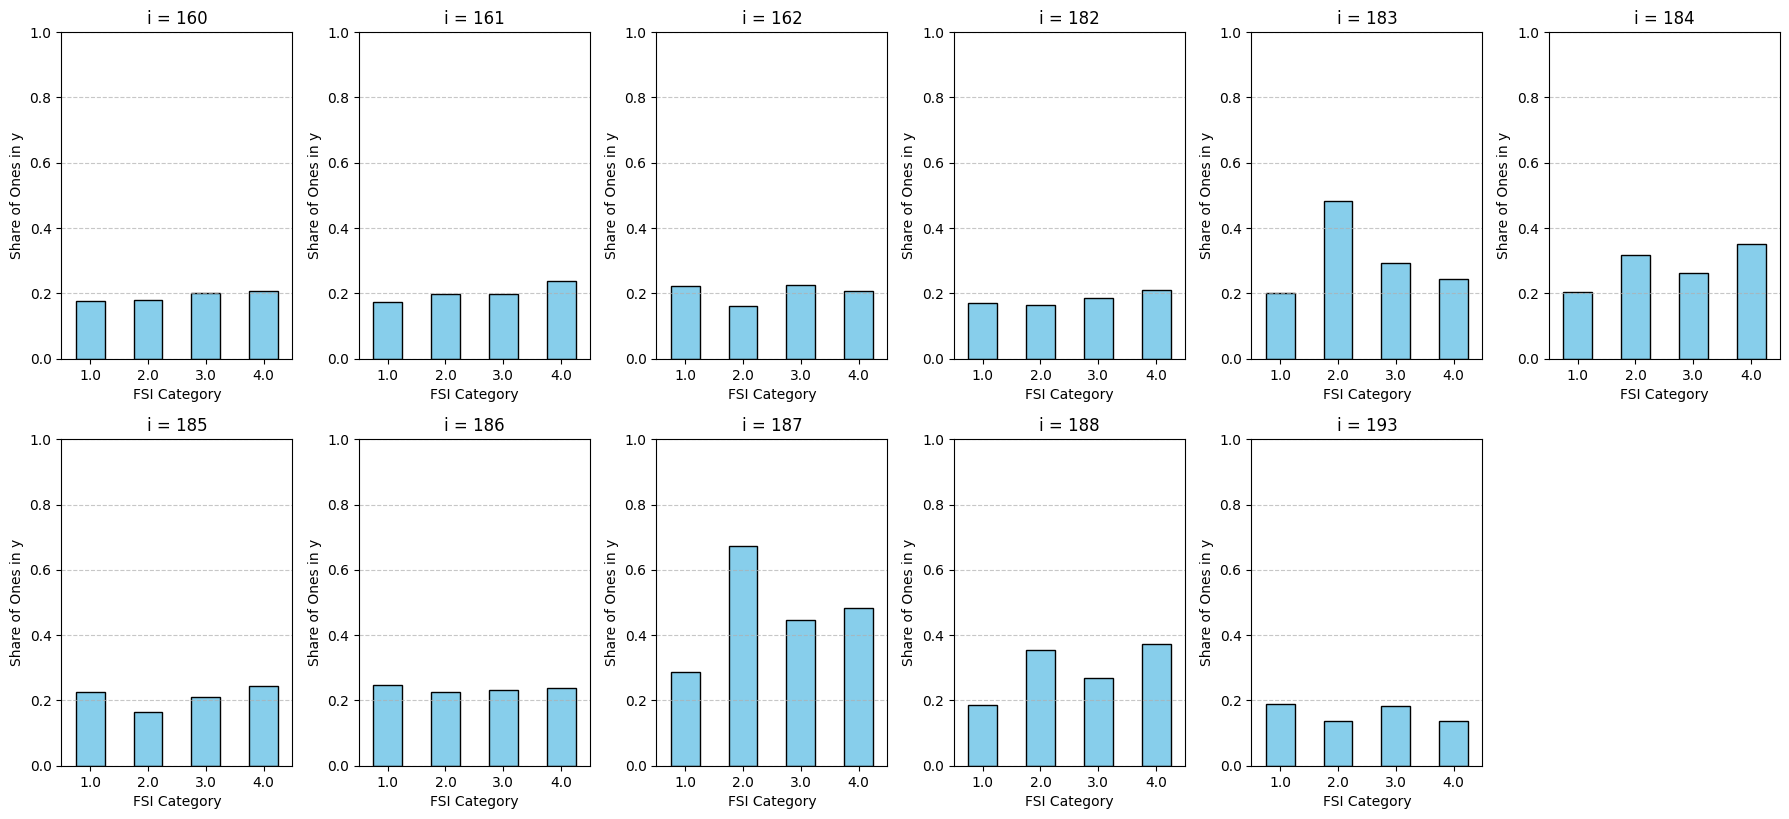

In [249]:
def plot_accuracy(i, df1, ax=None):
    name_gpt = f'Q{i}_gpt_recoded'
    name_natural = f'Q{i}_recoded'
    name_y = f'Q{i}_y_gpt_recoded'
    df1 = df1.copy()
    df1[name_y] = (df1[name_natural] == df1[name_gpt])
    share_ones = df1.groupby('fsi')[name_y].mean()
    share_ones = share_ones.sort_index()

    # Use the provided axis if present
    if ax is None:
        ax = plt.gca()
    share_ones.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_xlabel('FSI Category')
    ax.set_ylabel('Share of Ones in y')
    ax.set_title(f'i = {i}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.0)
    ax.set_xticklabels(share_ones.index, rotation=0)

# 24 elements, 6 rows, 4 columns
fig, axes = plt.subplots(4, 6, figsize=(18, 16))
axes = axes.flatten()

for idx, i in enumerate(arr):
    plot_accuracy(int(i), df_1_5, ax=axes[idx])

# Turn off any unused subplots (if arr < 24)
for j in range(len(arr), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [258]:
import pandas as pd

questions = [
    'Q158', 'Q159', 'Q160', 'Q161', 'Q162',
    'Q183', 'Q184', 'Q185', 'Q186',
    'Q187', 'Q188', 'Q189', 'Q190', 'Q191',
    'Q192', 'Q193', 'Q194', 'Q195'
]

mapping = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5}
df_1_5_yandex = df_yandex.copy()   # копия исходного

def recode(col):
    return pd.to_numeric(col, errors='coerce').map(mapping)

for q in questions:
    # Реальные ответы
    if q in df_1_5_yandex.columns:
        df_1_5_yandex[f"{q}_recoded"] = recode(df_1_5_yandex[q])
    # Ответы YandexGPT
    gpt_col = f"{q}_yandex"
    if gpt_col in df_1_5_yandex.columns:
        df_1_5_yandex[f"{gpt_col}_recoded"] = recode(df_1_5_yandex[gpt_col])

# Проверим, что новые столбцы появились
print([c for c in df_1_5_yandex.columns if c.endswith('_recoded')])

['Q158_recoded', 'Q158_yandex_recoded', 'Q159_recoded', 'Q159_yandex_recoded', 'Q160_recoded', 'Q160_yandex_recoded', 'Q161_recoded', 'Q161_yandex_recoded', 'Q162_recoded', 'Q162_yandex_recoded', 'Q183_recoded', 'Q183_yandex_recoded', 'Q184_recoded', 'Q184_yandex_recoded', 'Q185_recoded', 'Q185_yandex_recoded', 'Q186_recoded', 'Q186_yandex_recoded', 'Q187_recoded', 'Q187_yandex_recoded', 'Q188_recoded', 'Q188_yandex_recoded', 'Q189_recoded', 'Q189_yandex_recoded', 'Q190_recoded', 'Q190_yandex_recoded', 'Q191_recoded', 'Q191_yandex_recoded', 'Q192_recoded', 'Q192_yandex_recoded', 'Q193_recoded', 'Q193_yandex_recoded', 'Q194_recoded', 'Q194_yandex_recoded', 'Q195_recoded', 'Q195_yandex_recoded']


In [269]:
df_1_5_yandex.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287',
       ...
       'Q191_recoded', 'Q191_yandex_recoded', 'Q192_recoded',
       'Q192_yandex_recoded', 'Q193_recoded', 'Q193_yandex_recoded',
       'Q194_recoded', 'Q194_yandex_recoded', 'Q195_recoded',
       'Q195_yandex_recoded'],
      dtype='object', length=123)

In [276]:
arr_y = [160, 161, 162, 184, 185, 186, 188, 195]

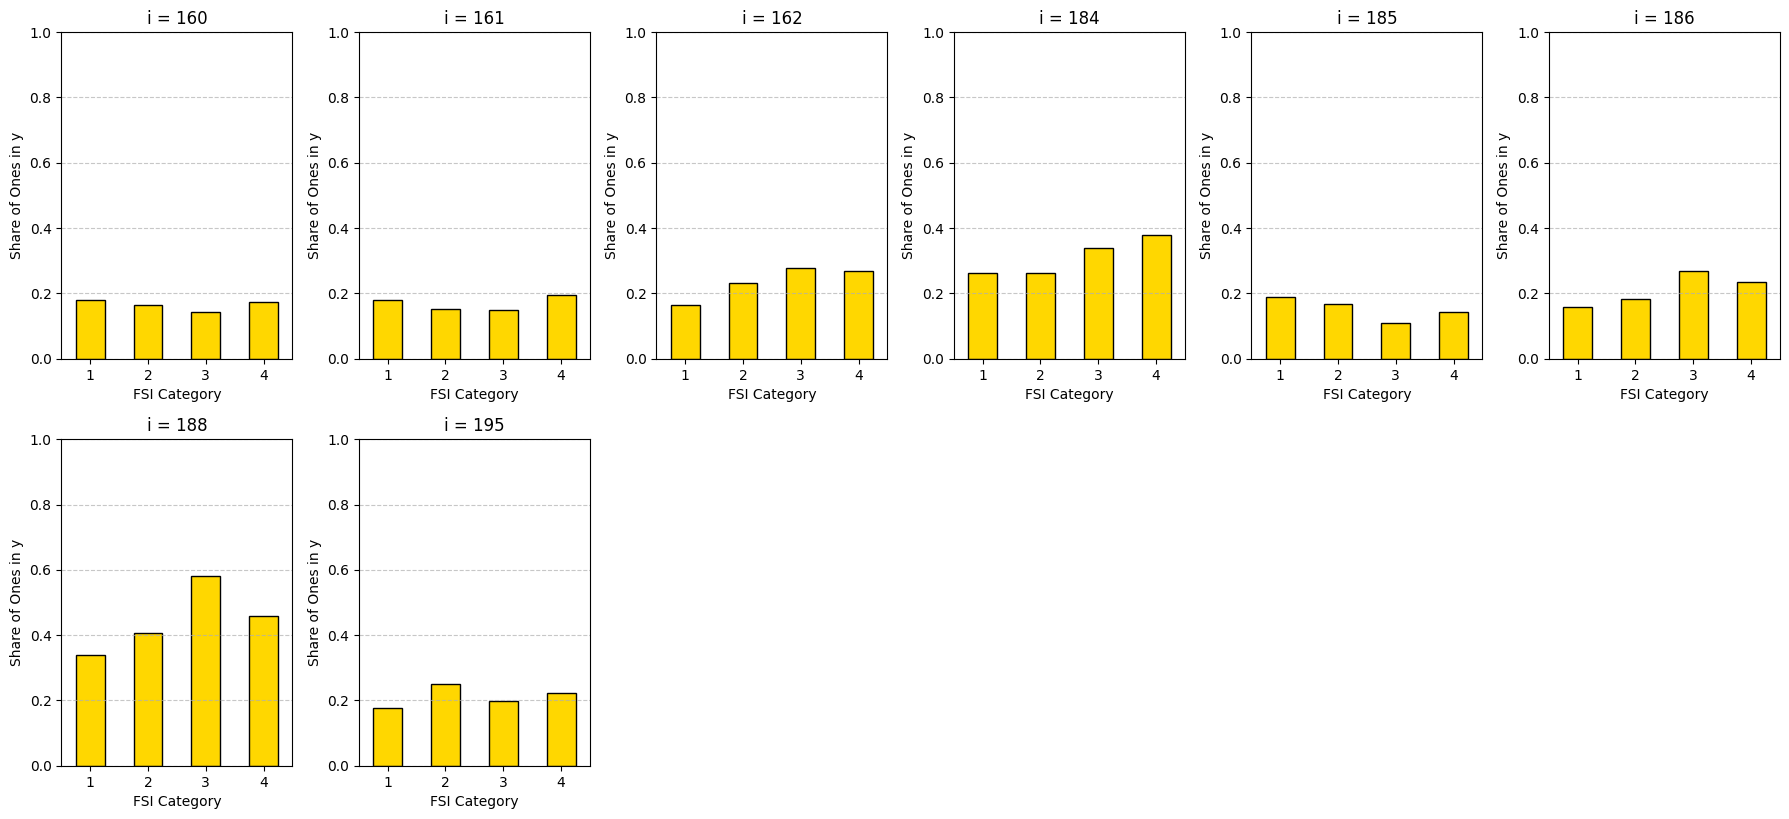

In [277]:
def plot_accuracy(i, df1, ax=None):
    name_gpt = f'Q{i}_yandex_recoded'
    name_natural = f'Q{i}_recoded'
    name_y = f'Q{i}_y_yandex_recoded'
    df1 = df1.copy()
    df1[name_y] = (df1[name_natural] == df1[name_gpt])
    share_ones = df1.groupby('fsi_rus')[name_y].mean()
    share_ones = share_ones.sort_index()

    # Use the provided axis if present
    if ax is None:
        ax = plt.gca()
    share_ones.plot(kind='bar', color='gold', edgecolor='black', ax=ax)
    ax.set_xlabel('FSI Category')
    ax.set_ylabel('Share of Ones in y')
    ax.set_title(f'i = {i}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.0)
    ax.set_xticklabels(share_ones.index, rotation=0)

# 24 elements, 6 rows, 4 columns
fig, axes = plt.subplots(4, 6, figsize=(18, 16))
axes = axes.flatten()

for idx, i in enumerate(arr_y):
    plot_accuracy(int(i), df_1_5_yandex, ax=axes[idx])

# Turn off any unused subplots (if arr < 24)
for j in range(len(arr_y), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [270]:
df_1_5_yandex.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287',
       ...
       'Q191_recoded', 'Q191_yandex_recoded', 'Q192_recoded',
       'Q192_yandex_recoded', 'Q193_recoded', 'Q193_yandex_recoded',
       'Q194_recoded', 'Q194_yandex_recoded', 'Q195_recoded',
       'Q195_yandex_recoded'],
      dtype='object', length=123)

In [272]:
questions = [
    'Q158', 'Q159', 'Q160', 'Q161', 'Q162',
    'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189',
    'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195'
]

# Для каждой QXXX создаём колонку QXXX_y_gpt, где 1 = совпадают, 0 = нет
for q in questions:
    gpt_col = f"{q}_yandex_recoded"         
    new_col = f"{q}_y_yandex_recoded"    
    df_1_5_yandex[new_col] = (df_1_5_yandex[q] == df_1_5_yandex[gpt_col]).astype(int)

df_1_5_yandex

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q186_y_yandex_recoded,Q187_y_yandex_recoded,Q188_y_yandex_recoded,Q189_y_yandex_recoded,Q190_y_yandex_recoded,Q191_y_yandex_recoded,Q192_y_yandex_recoded,Q193_y_yandex_recoded,Q194_y_yandex_recoded,Q195_y_yandex_recoded
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,0,1,1,1,1,1,1,0,1,0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0,1,0,1,1,1,1,0,1,1
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0,0,0,1,1,0,1,0,1,0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0,0,0,1,1,1,1,0,1,0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,85303,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,0,1,1,1,1,1,1,0,1,1
82938,85304,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,0,1,1,1,0,1,1,0,1,0
82939,85305,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,1,1,1,1,1,1,1,0,1,0
82940,85306,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,1,1,1,1,1,1,1,1,1,0


In [273]:
df_q188_yandex_recoded = df_1_5_yandex.copy()
df_q188_yandex_recoded = df_q188_yandex_recoded.dropna(subset = ['Q188_recoded', 'Q188_y_yandex_recoded'])

formula = (
    'Q188_y_yandex_recoded ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q188_yandex_recoded)
results_q188_yandex_recoded = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q188_yandex_recoded.summary())

Optimization terminated successfully.
         Current function value: 0.666498
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                             Logit Regression Results                            
Dep. Variable:     Q188_y_yandex_recoded   No. Observations:                80152
Model:                             Logit   Df Residuals:                    80148
Method:                              MLE   Df Model:                            3
Date:                   Fri, 13 Jun 2025   Pseudo R-squ.:                0.006704
Time:                           20:02:18   Log-Likelihood:                -53421.
converged:                          True   LL-Null:                       -53782.
Covariance Type:               nonrobust   LLR p-value:                5.636e-156
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inte

In [274]:
df_q183_yandex_recoded = df_1_5_yandex.copy()
df_q183_yandex_recoded = df_q183_yandex_recoded.dropna(subset = ['Q183_recoded', 'Q183_y_yandex_recoded'])

formula = (
    'Q183_y_yandex_recoded ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q183_yandex_recoded)
results_q183_yandex_recoded = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q183_yandex_recoded.summary())

Optimization terminated successfully.
         Current function value: 0.676814
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                             Logit Regression Results                            
Dep. Variable:     Q183_y_yandex_recoded   No. Observations:                75304
Model:                             Logit   Df Residuals:                    75300
Method:                              MLE   Df Model:                            3
Date:                   Fri, 13 Jun 2025   Pseudo R-squ.:                 0.02031
Time:                           20:03:43   Log-Likelihood:                -50967.
converged:                          True   LL-Null:                       -52024.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inte

In [275]:
df_q184_gpt_recoded = df_1_5.copy()
df_q184_gpt_recoded = df_q184_gpt_recoded.dropna(subset = ['Q184_recoded', 'Q184_y_gpt_recoded'])

formula = (
    'Q184_y_gpt_recoded ~ C(fsi_rus)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df_q184_gpt_recoded)
results_q184_gpt_recoded = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results_q184_gpt_recoded.summary())

Optimization terminated successfully.
         Current function value: 0.561416
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
                             Logit Regression Results                            
Dep. Variable:     Q184_y_yandex_recoded   No. Observations:                81577
Model:                             Logit   Df Residuals:                    81573
Method:                              MLE   Df Model:                            3
Date:                   Fri, 13 Jun 2025   Pseudo R-squ.:                 0.01354
Time:                           20:04:24   Log-Likelihood:                -45799.
converged:                          True   LL-Null:                       -46427.
Covariance Type:               nonrobust   LLR p-value:                2.661e-272
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inte

In [278]:
import statsmodels.api as sm

# Q162
df_q162_yandex_recoded = df_1_5_yandex.copy()
df_q162_yandex_recoded = df_q162_yandex_recoded.dropna(subset=['Q162_recoded', 'Q162_y_yandex_recoded'])

formula_162 = (
    'Q162_y_yandex_recoded ~ C(fsi_rus) +', 'ICT_Dev_Index_2024'
)

model_162 = sm.formula.logit(formula_162, data=df_q162_yandex_recoded)
results_q162_yandex_recoded = model_162.fit(method='bfgs', maxiter=1000)

print("=== Q162 Results ===")
print(results_q162_yandex_recoded.summary())

# Q184
df_q184_yandex_recoded = df_1_5_yandex.copy()
df_q184_yandex_recoded = df_q184_yandex_recoded.dropna(subset=['Q184_recoded', 'Q184_y_yandex_recoded'])

formula_184 = (
    'Q184_y_yandex_recoded ~ C(fsi_rus) +', 'ICT_Dev_Index_2024'
)

model_184 = sm.formula.logit(formula_184, data=df_q184_yandex_recoded)
results_q184_yandex_recoded = model_184.fit(method='bfgs', maxiter=1000)

print("=== Q184 Results ===")
print(results_q184_yandex_recoded.summary())

# Q188
df_q188_yandex_recoded = df_1_5_yandex.copy()
df_q188_yandex_recoded = df_q188_yandex_recoded.dropna(subset=['Q188_recoded', 'Q188_y_yandex_recoded'])

formula_188 = (
    'Q188_y_yandex_recoded ~  C(fsi_rus) +', 'ICT_Dev_Index_2024'
)

model_188 = sm.formula.logit(formula_188, data=df_q188_yandex_recoded)
results_q188_yandex_recoded = model_188.fit(method='bfgs', maxiter=1000)

print("=== Q188 Results ===")
print(results_q188_yandex_recoded.summary())

Optimization terminated successfully.
         Current function value: 0.435373
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
=== Q162 Results ===
                             Logit Regression Results                            
Dep. Variable:     Q162_y_yandex_recoded   No. Observations:                80254
Model:                             Logit   Df Residuals:                    80250
Method:                              MLE   Df Model:                            3
Date:                   Fri, 13 Jun 2025   Pseudo R-squ.:                0.006281
Time:                           20:19:14   Log-Likelihood:                -34940.
converged:                          True   LL-Null:                       -35161.
Covariance Type:               nonrobust   LLR p-value:                 2.065e-95
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [280]:
df_1_5.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287',
       ...
       'Q191_recoded', 'Q191_gpt_recoded', 'Q192_recoded', 'Q192_gpt_recoded',
       'Q193_recoded', 'Q193_gpt_recoded', 'Q194_recoded', 'Q194_gpt_recoded',
       'Q195_recoded', 'Q195_gpt_recoded'],
      dtype='object', length=145)

In [282]:
questions = [
    'Q158', 'Q159', 'Q160', 'Q161', 'Q162', 'Q177',
    'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184',
    'Q185', 'Q186', 'Q187', 'Q188', 'Q189',
    'Q190', 'Q191', 'Q192', 'Q193', 'Q194', 'Q195'
]

# Для каждой QXXX создаём колонку QXXX_y_gpt, где 1 = совпадают, 0 = нет
for q in questions:
    gpt_col = f"{q}_gpt_recoded"         
    new_col = f"{q}_y_gpt_recoded"    
    df_1_5[new_col] = (df_1_5[q] == df_1_5[gpt_col]).astype(int)

df_1_5

,Unnamed: 0,A_YEAR,code,country,X003R2,Q260,Q272,Q275,Q288R,Q287,...,Q186_y_gpt_recoded,Q187_y_gpt_recoded,Q188_y_gpt_recoded,Q189_y_gpt_recoded,Q190_y_gpt_recoded,Q191_y_gpt_recoded,Q192_y_gpt_recoded,Q193_y_gpt_recoded,Q194_y_gpt_recoded,Q195_y_gpt_recoded
0,0,2018,AND,Andorra,3,2,1270,1,2,3,...,1,0,0,1,1,1,1,0,1,0
1,1,2018,AND,Andorra,2,1,1270,3,3,2,...,0,0,0,1,1,1,1,0,1,0
2,2,2018,AND,Andorra,2,1,810,3,2,3,...,0,0,0,1,1,0,1,0,1,0
3,3,2018,AND,Andorra,3,2,1270,1,2,4,...,0,0,1,1,0,1,1,0,1,0
4,4,2018,AND,Andorra,2,1,1270,1,2,4,...,0,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85303,95402,2020,ZWE,Zimbabwe,2,2,3830,0,2,3,...,0,1,1,1,0,1,1,0,1,0
85304,95403,2020,ZWE,Zimbabwe,2,1,3200,3,2,2,...,0,0,0,1,0,1,1,0,1,0
85305,95404,2020,ZWE,Zimbabwe,1,2,3830,1,2,4,...,0,1,1,1,1,1,1,0,1,0
85306,95405,2020,ZWE,Zimbabwe,2,2,3830,1,1,4,...,0,1,0,1,1,1,1,0,1,0


In [293]:
import statsmodels.api as sm

# Q183
df_q183_gpt_recoded = df_1_5.copy()
df_q183_gpt_recoded = df_q183_gpt_recoded.dropna(subset=['Q183_recoded', 'Q183_y_gpt_recoded'])

formula_183 = (
    'Q183_y_gpt_recoded ~ C(fsi)'  # + 'ICT_Dev_Index_2024'
)

model_183 = sm.formula.logit(formula_183, data=df_q183_gpt_recoded)
results_q183_gpt_recoded = model_183.fit(method='bfgs', maxiter=1000)

print("=== Q183 Results ===")
print(results_q183_gpt_recoded.summary())


# Q184
df_q184_gpt_recoded = df_1_5.copy()
df_q184_gpt_recoded = df_q184_gpt_recoded.dropna(subset=['Q184_recoded', 'Q184_y_gpt_recoded'])

formula_184 = (
    'Q184_y_gpt_recoded ~ C(fsi)'  # + 'ICT_Dev_Index_2024'
)

model_184 = sm.formula.logit(formula_184, data=df_q184_gpt_recoded)
results_q184_gpt_recoded = model_184.fit(method='bfgs', maxiter=1000)

print("=== Q184 Results ===")
print(results_q184_gpt_recoded.summary())


# Q187
df_q187_gpt_recoded = df_1_5.copy()
df_q187_gpt_recoded = df_q187_gpt_recoded.dropna(subset=['Q187_recoded', 'Q187_y_gpt_recoded'])

formula_187 = (
    'Q187_y_gpt_recoded ~ C(fsi)'  # + 'ICT_Dev_Index_2024'
)

model_187 = sm.formula.logit(formula_187, data=df_q187_gpt_recoded)
results_q187_gpt_recoded = model_187.fit(method='bfgs', maxiter=1000)

print("=== Q187 Results ===")
print(results_q187_gpt_recoded.summary())


# Q188
df_q188_gpt_recoded = df_1_5.copy()
df_q188_gpt_recoded = df_q188_gpt_recoded.dropna(subset=['Q188_recoded', 'Q188_y_gpt_recoded'])

formula_188 = (
    'Q188_y_gpt_recoded ~ C(fsi)'  # + 'ICT_Dev_Index_2024'
)

model_188 = sm.formula.logit(formula_188, data=df_q188_gpt_recoded)
results_q188_gpt_recoded = model_188.fit(method='bfgs', maxiter=1000)

print("=== Q188 Results ===")
print(results_q188_gpt_recoded.summary())

Optimization terminated successfully.
         Current function value: 0.506274
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
=== Q183 Results ===
                           Logit Regression Results                           
Dep. Variable:     Q183_y_gpt_recoded   No. Observations:                75304
Model:                          Logit   Df Residuals:                    75300
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Jun 2025   Pseudo R-squ.:                 0.04990
Time:                        13:53:19   Log-Likelihood:                -38124.
converged:                       True   LL-Null:                       -40127.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept  

In [286]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Создаём переменную разницы
df_diff = df_fin.copy()
df_diff['diff_184_gpt'] = (df_diff['Q184'] - df_diff['Q184_gpt']).abs()

# Удаляем пропущенные значения
df_diff = df_diff.dropna(subset=['diff_184_gpt', 'fsi'])

# Простая линейная регрессия
model = smf.ols('diff_184_gpt ~ C(fsi)', data=df_diff)
results = model.fit()

# Выводим результаты
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           diff_184_gpt   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     331.3
Date:                Fri, 13 Jun 2025   Prob (F-statistic):          7.45e-214
Time:                        21:12:52   Log-Likelihood:            -1.5879e+05
No. Observations:               82935   AIC:                         3.176e+05
Df Residuals:                   82931   BIC:                         3.176e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6313      0.009    278.239

# # FSI ЛИНЕЙНАЯ РЕГРЕССИЯ ДЛЯ CHAT GPT 

In [294]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Список интересующих вопросов
q_ids = [183, 184, 187, 188]

# Копируем исходный датафрейм один раз
df_diff = df_fin.copy()

# Цикл по каждому вопросу
for q in q_ids:
    # Создаём название переменных
    human_col = f'Q{q}'
    gpt_col   = f'Q{q}_gpt'
    diff_col  = f'diff_{q}_gpt'
    
    # Абсолютная разница
    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col]).abs()
    
    # Удаляем пропуски только для текущей модели
    df_tmp = df_diff.dropna(subset=[diff_col, 'fsi'])
    
    # Линейная регрессия diff ~ C(fsi)
    model   = smf.ols(f'{diff_col} ~ C(fsi)', data=df_tmp)
    results = model.fit()
    
    # Выводим краткую сводку
    print(f'=== ОLS results for Q{q} ===')
    print(results.summary())
    print('\n' + '='*80 + '\n')

=== ОLS results for Q183 ===
                            OLS Regression Results                            
Dep. Variable:           diff_183_gpt   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     789.9
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:55:44   Log-Likelihood:            -1.6670e+05
No. Observations:               82935   AIC:                         3.334e+05
Df Residuals:                   82931   BIC:                         3.335e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        

In [296]:
df_fin.columns

Index(['Unnamed: 0', 'A_YEAR', 'code', 'country', 'X003R2', 'Q260', 'Q272',
       'Q275', 'Q288R', 'Q287', 'Q273', 'Q274', 'Q289', 'Q158', 'Q159', 'Q160',
       'Q161', 'Q162', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183',
       'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192',
       'Q193', 'Q194', 'Q195', 'Q158_gpt', 'Q159_gpt', 'Q160_gpt', 'Q161_gpt',
       'Q162_gpt', 'Q177_gpt', 'Q178_gpt', 'Q179_gpt', 'Q180_gpt', 'Q181_gpt',
       'Q182_gpt', 'Q183_gpt', 'Q184_gpt', 'Q185_gpt', 'Q186_gpt', 'Q187_gpt',
       'Q188_gpt', 'Q189_gpt', 'Q190_gpt', 'Q191_gpt', 'Q192_gpt', 'Q193_gpt',
       'Q194_gpt', 'Q195_gpt', 'GDP_per_capita_2024', 'GDP_wvs_year',
       'TradAgg', 'SurvSAgg', 'rd_idx_gpd', 'ict_idx_2024', 'language',
       'related_or_similar_to_eng', 'ling and/or cult differ',
       'cignificant ling and/or cult differ', 'exceptionally difficult', 'fsi',
       'Q158_y_gpt', 'Q159_y_gpt', 'Q160_y_gpt', 'Q161_y_gpt', 'Q162_y_gpt',
       '

In [299]:
df_fin[['GDP_wvs_year', 'TradAgg', 'SurvSAgg', 'rd_idx_gpd', 'GDP_per_capita_2024', 'ict_idx_2024', 'TradAgg', 'SurvSAgg']].corr()

,GDP_wvs_year,TradAgg,SurvSAgg,rd_idx_gpd,GDP_per_capita_2024,ict_idx_2024,TradAgg,SurvSAgg
GDP_wvs_year,1.000000,0.615874,0.755826,0.666628,0.977319,0.575309,0.615874,0.755826
TradAgg,0.615874,1.000000,0.576108,0.726995,0.562575,0.562836,1.000000,0.576108
SurvSAgg,0.755826,0.576108,1.000000,0.500981,0.695100,0.389298,0.576108,1.000000
rd_idx_gpd,0.666628,0.726995,0.500981,1.000000,0.650660,0.530912,0.726995,0.500981
GDP_per_capita_2024,0.977319,0.562575,0.695100,0.650660,1.000000,0.580224,0.562575,0.695100
ict_idx_2024,0.575309,0.562836,0.389298,0.530912,0.580224,1.000000,0.562836,0.389298
TradAgg,0.615874,1.000000,0.576108,0.726995,0.562575,0.562836,1.000000,0.576108
SurvSAgg,0.755826,0.576108,1.000000,0.500981,0.695100,0.389298,0.576108,1.000000


# # ЛИНЕЙНАЯ РЕГРЕССИЯ СО СТРАНОВЫМИ ПРЕДИКТОРАМИ ДЛЯ CHAT GPT

In [318]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Список интересующих вопросов
q_ids = [160, 161, 162, 182, 183, 184, 185, 186, 187, 188, 193]

# Копируем исходный датафрейм один раз
df_diff = df_fin.copy()

# формируем формулу целиком
controls = [
    # "GDP_per_capita_2024",
    "rd_idx_gpd",
    "ict_idx_2024"
]
ctrl_str = " + ".join(controls)

for q in q_ids:
    human_col = f"Q{q}"
    gpt_col   = f"Q{q}_gpt"
    diff_col  = f"diff_{q}_gpt"

    # Coerce to numeric to prevent type errors
    df_diff[human_col] = pd.to_numeric(df_diff[human_col], errors='coerce')
    df_diff[gpt_col]   = pd.to_numeric(df_diff[gpt_col], errors='coerce')

    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col]).abs()

    # Убираем fsi из dropna
    df_tmp = df_diff.dropna(subset=[diff_col, *controls])

    # Убираем fsi из формулы
    formula = f"{diff_col} ~ {ctrl_str}"
    model   = smf.ols(formula=formula, data=df_tmp).fit(cov_type="HC3")  # робастные s.e.

    print(f"=== OLS results for Q{q} ===")
    print(model.summary())
    print("\n" + "="*80 + "\n")

=== OLS results for Q160 ===
                            OLS Regression Results                            
Dep. Variable:           diff_160_gpt   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     964.5
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:53:17   Log-Likelihood:            -1.6159e+05
No. Observations:               75385   AIC:                         3.232e+05
Df Residuals:                   75382   BIC:                         3.232e+05
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.

In [327]:
import pandas as pd
import statsmodels.formula.api as smf

q_ids = [160, 161, 162, 184, 185, 186, 187, 188, 195]

country_controls = ["rd_idx_gpd", "ict_idx_2024"]
ctrl_str = " + ".join(country_controls)

df_diff = df_yandex.copy()

for q in q_ids:
    human_col = f"Q{q}"
    gpt_col   = f"Q{q}_yandex"
    diff_col  = f"diff_{q}_yandex"

    # гарантированно переводим оба столбца в числовой тип
    df_diff[human_col] = pd.to_numeric(df_diff[human_col], errors='coerce')
    df_diff[gpt_col]   = pd.to_numeric(df_diff[gpt_col],   errors='coerce')

    # абсолютная ошибка (10-балльная шкала)
    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col]).abs()

    # удаляем строки с пропусками в diff и контролях
    df_tmp = df_diff.dropna(subset=[diff_col, *country_controls])

    formula = f"{diff_col} ~ {ctrl_str}"
    model   = smf.ols(formula=formula, data=df_tmp).fit(cov_type="HC3")

    print(f"=== OLS results for Q{q} (country controls only) ===")
    print(model.summary())
    print("\n" + "="*80 + "\n")

=== OLS results for Q160 (country controls only) ===
                            OLS Regression Results                            
Dep. Variable:        diff_160_yandex   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     491.0
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          1.40e-212
Time:                        23:10:31   Log-Likelihood:            -1.6747e+05
No. Observations:               75377   AIC:                         3.349e+05
Df Residuals:                   75374   BIC:                         3.350e+05
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [311]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Вопросы, для которых считаем среднюю абсолютную ошибку
q_ids = [162, 184, 186, 188]


# Оставляем только страновые (macro-level) предикторы
country_controls = [
    "TradAgg",        # индекс традиционализма/самовыражения
    "SurvSAgg",       # индекс выживание – самовыражение
    "rd_idx_gpd",     # затраты на R&D (% ВВП)
    "ict_idx_2024"    # индекс развития ИКТ
]
ctrl_str = " + ".join(country_controls)

df_diff = df_yandex.copy()          # копируем исходный датафрейм

for q in q_ids:
    human_col = f"Q{q}"
    gpt_col   = f"Q{q}_yandex"
    diff_col  = f"diff_{q}_yandex"

    # абсолютная ошибка
    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col])
    
    # удаляем строки с пропусками в переменной ошибки и контролях
    df_tmp = df_diff.dropna(subset=[diff_col, *country_controls])

    # модель содержит ТОЛЬКО страновые предикторы
    formula = f"{diff_col} ~ {ctrl_str}"
    model   = smf.ols(formula=formula, data=df_tmp) \
                 .fit(cov_type="HC3")          # робастные стандартные ошибки

    print(f"=== OLS results for Q{q} (country controls only) ===")
    print(model.summary())
    print("\n" + "="*80 + "\n")

=== OLS results for Q162 (country controls only) ===
                            OLS Regression Results                            
Dep. Variable:        diff_162_yandex   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     280.1
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          2.41e-239
Time:                        21:53:52   Log-Likelihood:            -1.8140e+05
No. Observations:               68708   AIC:                         3.628e+05
Df Residuals:                   68703   BIC:                         3.628e+05
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

# FSI ЛИНЕЙНАЯ РЕГРЕССИЯ ДЛЯ ЯНДЕКСА

In [295]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Список интересующих вопросов
q_ids = [162, 184, 186, 188]

# Копируем исходный датафрейм один раз
df_diff = df_yandex.copy()

# Цикл по каждому вопросу
for q in q_ids:
    # Создаём название переменных
    human_col = f'Q{q}'
    gpt_col   = f'Q{q}_yandex'
    diff_col  = f'diff_{q}_yandex'
    
    # Абсолютная разница
    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col]).abs()
    
    # Удаляем пропуски только для текущей модели
    df_tmp = df_diff.dropna(subset=[diff_col, 'fsi_rus'])
    
    # Линейная регрессия diff ~ C(fsi)
    model   = smf.ols(f'{diff_col} ~ C(fsi_rus)', data=df_tmp)
    results = model.fit()
    
    # Выводим краткую сводку
    print(f'=== ОLS results for Q{q} ===')
    print(results.summary())
    print('\n' + '='*80 + '\n')

=== ОLS results for Q162 ===
                            OLS Regression Results                            
Dep. Variable:        diff_162_yandex   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     367.6
Date:                Sun, 15 Jun 2025   Prob (F-statistic):          3.30e-237
Time:                        11:21:52   Log-Likelihood:            -1.8441e+05
No. Observations:               82933   AIC:                         3.688e+05
Df Residuals:                   82929   BIC:                         3.689e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept    

# # ЛИНЕЙНАЯ РЕГРЕССИЯ СО СТРАНОВЫМИ ПРЕДИКТОРАМИ ДЛЯ ЯНДЕКСА

In [303]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Список интересующих вопросов
q_ids = [162, 184, 186, 188]

# Копируем исходный датафрейм один раз
df_diff = df_yandex.copy()

# формируем формулу целиком
controls = [
   #  "GDP_per_capita_2024",
    "TradAgg",
    "SurvSAgg",
    "rd_idx_gpd",
    "ict_idx_2024"
]
ctrl_str = " + ".join(controls)

for q in q_ids:
    human_col = f"Q{q}"
    gpt_col   = f"Q{q}_yandex"
    diff_col  = f"diff_{q}_yandex"

    df_diff[diff_col] = (df_diff[human_col] - df_diff[gpt_col]).abs()
    df_tmp = df_diff.dropna(subset=[diff_col, "fsi_rus", *controls])

    formula = f"{diff_col} ~ C(fsi_rus) + {ctrl_str}"
    model   = smf.ols(formula=formula, data=df_tmp).fit(cov_type="HC3")  # робастные s.e.

    print(f"=== OLS YANDEX results for Q{q} ===")
    print(model.summary())
    print("\n" + "="*80 + "\n")

=== OLS YANDEX results for Q162 ===
                            OLS Regression Results                            
Dep. Variable:        diff_162_yandex   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     442.2
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:27:28   Log-Likelihood:            -1.5247e+05
No. Observations:               68708   AIC:                         3.050e+05
Df Residuals:                   68700   BIC:                         3.050e+05
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Interc